In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [29]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [30]:
fruits_data = pd.read_csv("fruits.csv")

In [31]:
fruits_data.head(10)

,weight,peel color,flesh color,texture,size,name
0,172,82,48,11,68,mango
1,164,40,55,27,168,mango
2,172,53,44,23,64,mango
3,141,73,35,20,114,mango
4,155,73,55,14,80,mango
5,157,75,45,29,135,mango
6,149,46,51,14,152,mango
7,186,65,53,20,156,mango
8,194,46,36,21,170,mango
9,188,57,48,22,135,mango


In [32]:
x = fruits_data.drop(columns="name")
x.head()

,weight,peel color,flesh color,texture,size
0,172,82,48,11,68
1,164,40,55,27,168
2,172,53,44,23,64
3,141,73,35,20,114
4,155,73,55,14,80


In [33]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(fruits_data[["name"]]).toarray())
y = enc_df

In [34]:
y.head(10)

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.3)

In [36]:
x_train.head()

,weight,peel color,flesh color,texture,size
3889,228,6,69,8,64
2950,1193,52,44,78,340
1856,195,73,52,44,61
4618,47,247,208,84,1996
607,193,23,63,27,118


In [37]:
y_train.head()

,0,1,2,3,4
3889,1.0,0.0,0.0,0.0,0.0
2950,0.0,0.0,0.0,1.0,0.0
1856,0.0,0.0,1.0,0.0,0.0
4618,0.0,0.0,0.0,0.0,1.0
607,0.0,1.0,0.0,0.0,0.0


In [38]:
model = Sequential()
model.add(Dense(5, input_shape = (5,), activation='relu'))
model.add(Dense(125, activation='sigmoid'))
model.add(Dense(5, activation = 'softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 125)               750       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 630       
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
110/110 [==============================] - 0s 1ms/step - loss: 0.9891 - accuracy: 0.7326
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.8917
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.9131
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.9214
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1976 - accuracy: 0.9343
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9500
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9597
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 0.1139 - accuracy: 0.9649
Epoch 9/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9669
Epoch 10/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0897 - accura

In [42]:
model.history.history

{'loss': [0.9891489744186401,
  0.47859522700309753,
  0.32097941637039185,
  0.24728722870349884,
  0.19764994084835052,
  0.15925590693950653,
  0.13191546499729156,
  0.11385338753461838,
  0.097459577023983,
  0.08972614258527756,
  0.08345649391412735,
  0.07958626002073288,
  0.07416176795959473,
  0.07192113250494003,
  0.07256694883108139,
  0.07242980599403381,
  0.06866021454334259,
  0.0713840201497078,
  0.06751521676778793,
  0.06516479700803757,
  0.06414775550365448,
  0.06449809670448303,
  0.06797787547111511,
  0.06434059143066406,
  0.06312784552574158,
  0.06105877086520195,
  0.06762907654047012,
  0.06381414085626602,
  0.06109587475657463,
  0.059819262474775314,
  0.06325384229421616,
  0.0623902902007103,
  0.06051557883620262,
  0.06230306625366211,
  0.06093095988035202,
  0.05955140292644501,
  0.0627780333161354,
  0.06255026161670685,
  0.06232710927724838,
  0.060923051089048386,
  0.05958195775747299,
  0.06149837002158165,
  0.059405017644166946,
  0.06

In [43]:
loss = model.history.history['loss']

<function matplotlib.pyplot.show(close=None, block=None)>

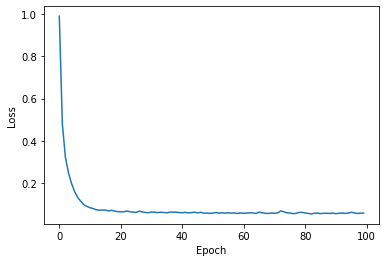

In [44]:
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show

In [45]:
accuracy = model.history.history['accuracy']

<function matplotlib.pyplot.show(close=None, block=None)>

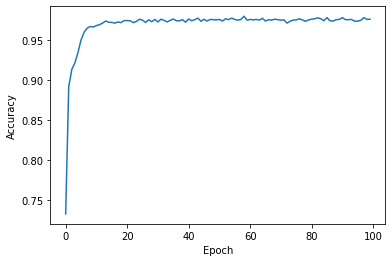

In [46]:
plt.plot(accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show

In [47]:
model.evaluate(x_test,y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.0783 - accuracy: 0.9687


[0.07826024293899536, 0.968666672706604]

In [48]:
prediction = model.predict(x_test)
newPrediction = np.argmax(prediction, axis = 1)
newPrediction
print(f'Test Predictions : {newPrediction}')
print(f'Actual Output : {y_test}')

Test Predictions : [0 2 4 ... 0 0 0]
Actual Output :         0    1    2    3    4
3457  1.0  0.0  0.0  0.0  0.0
1388  0.0  0.0  1.0  0.0  0.0
4695  0.0  0.0  0.0  0.0  1.0
4520  0.0  0.0  0.0  0.0  1.0
4983  0.0  0.0  0.0  0.0  1.0
...   ...  ...  ...  ...  ...
3205  1.0  0.0  0.0  0.0  0.0
326   0.0  1.0  0.0  0.0  0.0
3028  1.0  0.0  0.0  0.0  0.0
3770  1.0  0.0  0.0  0.0  0.0
3483  1.0  0.0  0.0  0.0  0.0

[1500 rows x 5 columns]


In [49]:
model.predict([[500, 180, 220, 90, 10]]) * 100

array([[4.9028057e-04, 4.3698028e-01, 7.9961225e-02, 1.7105961e-07,
        9.9482574e+01]], dtype=float32)

In [50]:
model.save("fruits_classifier.h5")

In [51]:
model.predict([[500, 180, 220, 90, 10]])

array([[4.9028058e-06, 4.3698028e-03, 7.9961226e-04, 1.7105961e-09,
        9.9482572e-01]], dtype=float32)

In [52]:
result = model.predict([[185,49,49,10,110]])
max = np.argmax(result, axis = 1)
if result[0][max[0]] < 0.5:
    print("Less")
    print(result[0][max[0]])
else:
    print(result[0][max[0]])

0.9948821


In [53]:
result[0][max[0]]

0.9948821

In [54]:
result

array([[6.4357378e-06, 9.9488211e-01, 5.1113116e-03, 1.6284972e-07,
        8.7704166e-08]], dtype=float32)